# Math 725 Advanced Linear Algebra
## HW2


### Brent A. Thorne

brentathorne@gmail.com

##### Finite-Dimensional Vector Spaces

In [1]:
# import libraries
import numpy as np
import sympy as sym
from sympy.matrices import Matrix
from sympy import I
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

# fancy plot
def z_plot(z, c=None):
    n = len(z)
    plt.scatter(z.real, z.imag, c=c)
    for i in range(len(z)): # this got a bit fancy
        zz = z[i] + .06 *np.exp(1j*2*np.pi*i/n)  #offset text
        plt.text(zz.real, zz.imag, i, fontsize=12)
    z = np.append(z,z[0]) # close the shape
    plt.plot(z.real, z.imag, c=c)
    plt.grid(visible=True);
    plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', alpha = .2, linestyle='--')
    plt.axvline(0, color='black', alpha = .2, linestyle='--')  

## 1.  Span of $\Bbb{C}^4$
### Show that the list $(1,1,1,1), (1,i,-1,-i), (1,-1,1,-1), (1,-i,-1,i)$ spans $\Bbb{C}^4$ over $\Bbb{C}$. Conclude that this is a list of independent vectors, hence it is a basis.

#### Solution:
Our approach is to interpret these vectors as linear equations in the varibles $x_1,...,x_n$ that can be written in the form

$a_1 x_1+a_2 x_2+...+ a_nx_n =b$, 

where $b$ and the coefficients $a_1,...,a_n$ are complex numbers.  We assume that there is a solution exists and is unquie by defining $b=0$.  We use a reduced echelon matrix to demonstrate that the list is independent thus a basis that spans $\Bbb{C}^4$ over $\Bbb{C}$. 

In [15]:
# now show a Computational Method
A= Matrix([[1,1,1,1],
          [1,I,-1,-I],
          [1,-1,1,-1],
          [1,-I,-1,I]])

display(Latex(f'$A={sym.latex(A)}$'))
display(Latex('$A_{rref}'+f'={sym.latex(A.rref(pivots=False))}$ *note, Matrix is full rank.'))
display(Latex('We can see above that there are 4 pivots ' +
        'thus this list of vectors is independent ' +
        'and forms a valid basis of $\Bbb{C}^4$ over $\Bbb{C}.$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

##### Additional thoughts...
In class we dicussed how we might visualize these vectors as a sequence of steps in the complex plane.
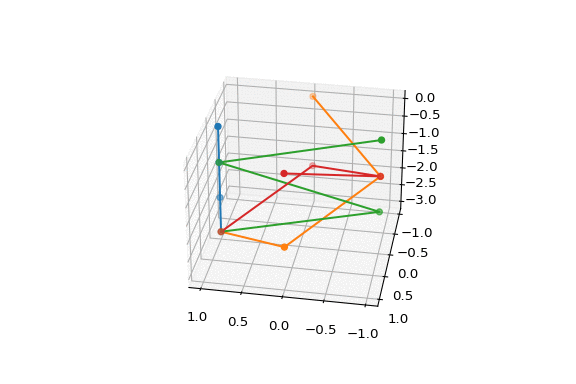

<IPython.core.display.Latex object>

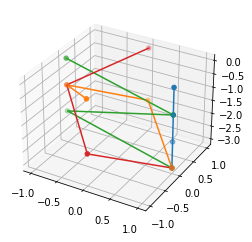

In [3]:
def z_plot(ZZ, c=None, angle=None):
    # assumes Z is a complex Matrix
    fig = plt.figure()
    ax =  plt.axes(projection='3d')
    if angle!=None:
        ax.view_init(30,angle) 
    
    for i in range(ZZ.shape[0]):
        Z = ZZ.row(i)

        # np.array for the real/imag members
        z = np.array(Z.tolist()).astype(np.complex64)[0] # try to set a better example
        if True:            
            z1= list(z.real)
            z2= list(z.imag)
            z3= list(reversed([-1*i for i in range(z.shape[0])])) # I'm sure there is a better way to do this
            ax.scatter3D(z1,z2,z3)
            display()
            ax.plot3D(z1,z2,z3) # plot3d doesn't like np.arrays
        else:  # a lazy way to disable this section
            plt.scatter(z.real, z.imag, c=c)
            plt.plot(z.real, z.imag, c=c)  
            plt.grid(visible=True);
            plt.gca().set_aspect("equal") # square grids are pretty
            plt.axhline(0, color='black', alpha = .2, linestyle='--')
            plt.axvline(0, color='black', alpha = .2, linestyle='--')

    if False:   # being lazy again    
        for angle in range(70,210,2):
            ax.view_init(30,angle)        
            #plt.show()
            filename='Data/C4_step'+str(angle)+'.png'
            plt.savefig(filename, dpi=96, transparent=False)
            plt.gca()

'''
# do system call..
mogrify -background white -flatten C4_step*
convert -delay 10 C4_step* animated_C4.gif
'''

display(Latex("We are showing our complex vectors in $C^4$ as a sequence.  " + \
              "The Z axis is used to show the sequence order with $Z=0$ being " +\
              "the 'present' (last vector element).  Not sure if this really helps " +\
              "to visualize $C^4$ but you can see the sequences go in different " +\
              "directions as you might expect for a $C^4$ basis."))
z_plot(A)

Matrix([
[1,      1,  1,      1],
[1,      I, -1,     -I],
[1,     -1,  1,     -1],
[1,     -I, -1,      I],
[0, -1 + I,  2, -1 - I]])

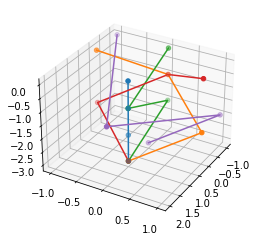

In [4]:
# now let's add dependent vector to our matrix
AA= A.col_join(A.row(2)-A.row(3))
z_plot(AA,angle = 30)
AA 
# Not so easy to see the Linear Dependance Lemma this way.
# Visualizing Higher Order Dimensions is hard.  
# At some point we must believe in the Induction of lower order spaces to 
# the higher ones. 
# "In Gauss we trust."

##### Additional Thoughts on visualizing basis as network graphs...

In [5]:
import networkx as nx

G = nx.Graph()
G.add_node(1)  # add one node at a time
G.add_nodes_from([2, 3]) # add iterable container of nodes

G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])  # with atributes

H = nx.path_graph(10)  # create a path to node
G.add_nodes_from(H)  # add graphs together

list(H)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

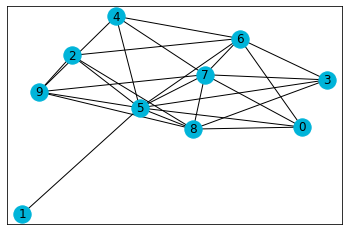

In [6]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(10, 5)
red = nx.random_lobster(10, 0.9, 0.9)

#nx.draw_networkx(er)
#nx.draw_networkx(ws)
nx.draw_networkx(ba, node_size=300, node_color='#00b4d9')
#nx.draw_networkx(red)

...enough messing about.  Time to get back to work.  We'll return to this later to add directed graphs.  

## 2. (2A 7)
### Prove or give a counterexample: If $v_1,...,v_m$ is a linearly independent list of vector in $V$, then

### $5v_1-4v_2,v_2,v_3,...,v_m$

### is also linearly independent.

#### Solution:
For $v_1,...,v_m$ to be a linearly independent list of vector in $V$, then the following must be true,

$a_1v_1+a_2v_2+...+ a_mv_m =0$ $| a_1,...,a_m\in \Bbb{F}$, where $a1=...=a_m=0$.

Now consider, $5v_1-4v_2,v_2,v_3,...,v_m$,

$a_1(5v_1-4v_2)+a_2v_2+...+ a_mv_m =0$ $\rightarrow$

$ 5a_1v_1 + (a_2-4a_1)v_2+...+ a_mx_m =0$, thus it follows that

$5a_1=0$, $a_2-4a_1=0$, and $a_3,...,a_m=0$, thus

$a1=a2=...=a_m=0$.  Thus linearly independent by definition.  (Is the definition a suffient proof?  I'm going to say yes as we believe in Gauss.)

## 3. (2A 13)
### Explain why no list for four polynomials spans $\mathcal{P}_4(\Bbb{F})$.

#### Solution:
Recall the form of a polynomial of degree 4,

$p(z) = a_0z^0+a_1z^1+a_2z^2+a_3z^3+a_4z^4$

We can see th1at $\mathcal{P}_4(\Bbb{F})=span(a_0,a_1z,a_2z^2,a_3z^3,a_4z^4)$, thus follows $span\mathcal{P}_4(\Bbb{F})$ we must have $4+1$ coefficients,

By Corallary to Linear Dependence Lemma, 

$len(list)\leq len(spanning\_list)$,

four polynomials cannot be a spanning list for this field.

## 4. (2A 15)
### Prove that $\Bbb{F}^{\infty}$ is infinite-dimensional.

#### Solution:
We'll use the definition of linear inpedance again and extend it for an infinite dimension.

$a_1v_1+a_2v_2+...+ a_iv_i + ... =0$ $| a_1,...,a_i\in \Bbb{F}$, the only choise that makes this true is $a_1=...=a_i=...=0$.  It would seem that we are done but somehow this tastes like a watery soup.

Suppose we defined a basis vector, $e_i=(0,...,0,1,0,...)$, such that all but the $i^{th}$ element is 0.  By exhaustive testing we can show that for $e_1,...e_m$ is linearly indendent $\forall m$ thus but induction conclude that $\Bbb{F}^{\infty}$ is infinite-dimensional.

I'm getting a sense that proofs are all about finding a Dual.  Isn't that how Évariste Galois died?

No that was a duel.  

## 5. (2B 3)

### (a) Let $U$ be the subspace of $\Bbb{R}^5$ define by

### $U = \{(x_1,x_2,x_3,x_4,x_5)\in \Bbb{R}^5: x_1=3x_2 \text{ and } x_3=7x_4\}$.

### Find a basis of $U$.

#### Solution:
Recall the crierion for basis:

A list of $v_i$ of vectors in $V$ is a basis of $V$ iff every $v\in V$ can be written uniquely in the form,

$v = \sum\limits_{i=1} a_iv_1| a_i\in \Bbb{F}$.

Thus form for a vector in the subspace U would be,
$u = a_1(3x_2)+a2x_2+a_3(7x4)+a_4x_4+a_5x_5$.  

Making the simplest choice $(x_2=x_4=x_5=1)$, our of a $spanning\_list$ is,

$(3,1,0,0,0), (0,0,7,1,0), (0,0,0,0,1)$.

### (b) Extend the basis of part (a) to a basis of $\Bbb{R}^5$.

#### Solution:
Our new $spanning\_list$ is,

$(3,1,0,0,0), (0,0,7,1,0), (0,0,0,0,1), (1,0,0,0,0), (0,0,1,0,0)$.

In [7]:
B = Matrix([[3,1,0,0,0], [0,0,7,1,0], [0,0,0,0,1], [1,0,0,0,0], [0,0,1,0,0]])
display(B)
display(B.rref(pivots=False))  #show this matrix is full rank

Matrix([
[3, 1, 0, 0, 0],
[0, 0, 7, 1, 0],
[0, 0, 0, 0, 1],
[1, 0, 0, 0, 0],
[0, 0, 1, 0, 0]])

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

### (c) Find a subspace $W$ of $\Bbb{R}^5$ such that $\Bbb{R}^5=U\oplus W$.

#### Solution:
We might define W like this..

$W = \{(x_1,x_2,x_3,x_4,x_5)\in \Bbb{R}^5: x_1=\frac{-x_2}{3} \text{ and } x_3=\frac{-x_4}{7}\}$,

however the simplest choice is $W = span\{(1,0,0,0,0),(0,0,1,0,0)\}$ as we found in (b).

In [8]:
# show the space and subspaces computationally
U = Matrix([[3,1,0,0,0], [0,0,7,1,0], [0,0,0,0,1]])
display(U)

W=Matrix([U.nullspace()]).T  
display(W)  # show nullspace result

V=U.col_join(W) # join the two subspaces
display(V.rref(pivots=False))  # show we have full rank

Matrix([
[3, 1, 0, 0, 0],
[0, 0, 7, 1, 0],
[0, 0, 0, 0, 1]])

Matrix([
[-1/3, 1,    0, 0, 0],
[   0, 0, -1/7, 1, 0]])

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

## 6. (2B 8)
### Suppose $U$ and $W$ are subspaced of $V$ such that $V=U\oplus W$.  Suppose also that $u_1,...u_m$ is a basis of $U$ and $w_1,...,w_n$ is a basis of $W$.

### Prove that 

### $u_1,...,u_m,w_1,...,w_n$

### is a basis of $V$.

#### Solution:
Following Axler's proof of 2.34...

To prove that $V=U\oplus W$ we need to only show that

$V=U+W$ and $U\cap W=\{0\}$. (See, Axler 1.45 Direct sum of two subspaces)

1) For the first equation, suppose $v\in V$, thus because the list $u_1,...,u_m,w_1,w_m$ spaces $V$ there exist $a_i, b_i \in F$ such that,

$v=\sum (a_i u_i + b_i w_i) \implies v = u+w$, where $u\in U$ and $w\in W$,

thus $v\in U+W$, hence $V=U+W$.

2) For the second equation, suppose $v\in U \cap W$ and there exist scalars $a_i,b_i\in F$ such that,

$v = \sum a_i u_i = \sum b_i w_n$.

If $u_i$ and $w_i$ are linearly independent then,

$\sum a_i u_i - \sum b_i w_n=0$ $\implies a_1=...=a_m=b_1=...=b_m=0$, thus $v=0$,

hence $U\cap W=\{0\}$.

## 7. Basis of $\Bbb{C}^3$ over $\Bbb{C}$
### Let $z$ be a non real third root of unity.

### Show that the list $(1,1,1), (1, z, z^2), (1,z^2,z^4)$ forms a basis of $C^3$ over $C$. 


In [19]:
# let's start with a simple generator to show the structure of this space
z = sym.symbols('z')  # see: challenge section below for the 'nth' root of unity.
C = Matrix([[z**0,z**0,z**0],
           [z**0,z**1,z**2],
           [z**0,z**2,z**4]])
display(C)
display(C.rref(pivots=False))

Matrix([
[1,    1,    1],
[1,    z, z**2],
[1, z**2, z**4]])

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

#### Solution:
We've learned that 'show' is a math code word for 'prove', however there isn't much to prove here.  Euler's form avoids any problems with additive properties so on with the program...  See: No Such Thing as a Fish

Noting that $\{z= e^{\frac{i2\pi}{n}}| n=3\}$, it's obvious that none of the vectors are multiples of each other and that the length of the list is equal to the length of a spanning list. Thus by '2.21 Linear Dependence Lemma' and '2.23 Length of linearly independent list $\leq$ length of spanning list' the given list forms a valid basis.

### Challenge question: Generalize this example from $C^3$ to $C^n$.  

In [22]:
# now let's generalize our generator
n=5 # Remind you of anything?  See: problem one.
#z = sym.symbols('z')
z = sym.exp(sym.I * 2*sym.pi/n)
C = Matrix([[z**(j*i) for j in range(n)] for i in range(n)])
display(z)
display(C)
display(C.rref(pivots=False)) # this function gets slow for large matrices

exp(2*I*pi/5)

Matrix([
[1,              1,              1,              1,              1],
[1,  exp(2*I*pi/5),  exp(4*I*pi/5), exp(-4*I*pi/5), exp(-2*I*pi/5)],
[1,  exp(4*I*pi/5), exp(-2*I*pi/5),  exp(2*I*pi/5), exp(-4*I*pi/5)],
[1, exp(-4*I*pi/5),  exp(2*I*pi/5), exp(-2*I*pi/5),  exp(4*I*pi/5)],
[1, exp(-2*I*pi/5), exp(-4*I*pi/5),  exp(4*I*pi/5),  exp(2*I*pi/5)]])

Matrix([
[1, 0, 0, 0, 0],
[0, 1, 0, 0, 0],
[0, 0, 1, 0, 0],
[0, 0, 0, 1, 0],
[0, 0, 0, 0, 1]])

#### Solution:
Show list of vectors as matrix...

The columns of $C$ represent the vectors in our list.

$C^\mathfrak{n} =\begin{Bmatrix} 
f_{(0, 0)} & f_{(0, 1)} & \cdots & f_{(0, n)} \\
f_{(1, 0)} & f_{(1, 1)} & \cdots & f_{(1, n)} \\ 
 \vdots & \vdots & \ddots & \vdots \\ 
f_{(m, 0)} & f_{(m, 1)} & \cdots & f_{(m\, n)} \\ 
\end{Bmatrix} $, 

where $0\leq n \leq \mathfrak{n-1}$, $0\leq m \leq \mathfrak{n-1}$ 

$f(i,j) = z^{ij}$ where $z= e^{\frac{i2\pi}{n}}, \in [0, n-1]$ and $j \in [0,n-1]$

Our generating function, $f(i,j) = z^{ij}$, assures that the vectors are multiples of each other and that the length of the list is equal to the length of a spanning list. Thus by '2.21 Linear Dependence Lemma' and '2.23 Length of linearly independent list $\leq$ length of spanning list' the given list forms a valid basis.


*FIXME!!! Ask how I can formalize my notation.  Gallian (CAA) shows a cyclic group generator as $G=\text{<a>}$.  Gallian also says that the cyclic groups $Z_n$ and $Z$ serve as prototypes for all cyclic groups, and that there is essentially only one cyclic group of each order... so our initial notation of $z^{ij}$ might actaully be the knees.

"We Are As Gods" - Stewart Brand.

## 8. (2C 1)
### Suppose $V$ is finite-dimensional and $U$ is a subspace of $V$ such that $dim U = dim V$.  Prove that $U=V$.

#### Solution:
We know (by 2.39) every linearly independent list of vectors in $V$ with length $dimV$ is a basis of $V$. 

If a linearly independent list of vectors in $U$ with length $dimU$ is a basis of $U$,

(by 2.33) it follows that if $V\subset U$, $U=V$ must be True.

## 9. (2C 9)
### Suppose $v_1,...,v_m$ is linearly independent in $V$ and $w\in V$.  Prove that

### $dim$ $span(v_1+w,...,v_m+w)\geq m-1$.

#### Solution:
Consider that $w\notin span(v_1,...v_m)$ then $w+v_1,...w+v_m$ is linearly independent in $V$ so $dim$  $span(w+v_1,...w+v_m)=m$.  If $w\in span(v_1,...,v_m)$ then there is a $w$ that can be uniquely written as $w=\sum\limits_{i=1}^{m}a_iv_i$.

This is a contradiction as we know that $w\in V$ thus adding $w$ to $v_i$ will result in the $i^{th}$ element becoming Linearly Depend by the Linear Dependence Lemma.  Thus $dim$ $span(v_1+w,...,v_m+w)\geq m-1$.  

FIXME!!! We could use the proof of 2.21 to be less hand-wavy.  My delimma with proofs is that something that we have already defined/proven ought to be an axiom.  These axioms get added to our 'library' so that we can reuse them without the need to prove them again.  BTW: Have you noticed how mathematics has a nasty habbit of calling the same thing by different names?  No doubt this is due to its rich history and the varied native languages of the developers.

See also, https://toanqpham.github.io/notes/linear_al_done_right_note.pdf

## 10. (2C 14)
### Suppose $U_1,...,U_m$ are finite-dimensional subspaces of $V$.  Prove that $U_1+...+U_m$ is finite-dimensional and

### $dim(U_1+...+U_m)\leq dim U_1+...+dim U_m$. 

#### Solution:
The proof is induction of '2.43 Dimension of a sum' $\mathfrak{m}$ times.  It's obvious that $\mathfrak{m}$ is finite, so our work here is done.

FIXME!!!  Ask if we are being lazy here, however it seems silly to repeat Axler's proof, then apply it inductively as stated.  We might consider invoking the Dual Basis as part of this proof.  Nope that's not till the next chapter...

Consider if every nonzero element has additve one-to-one (isomorphic to direct product). See, Gallian, Contemporary Abstract Algebra, Theorem 21.2 Structure of Finite Fields. 

FIXME!!! Ask about Finite Abelian Groups... Is this not normal/comfortable?  $\leftarrow$ What was I thinking about here, not normal? Something about +/* or */+ form transformation.  

Okay, it was rather late... the general idea was to apply cyclic groups to a finite basis to prove the set of nonzero elements is isomorphic.  This is rather like what we did in P7 but we use the direct product to avoid invoking isomorphism.

*Seemed to make sense at the time... Ask for Arek for some insight.

## Appendix 1. The Colour Out of Space


"It is not because of anything that can be seen or heard or handled, but because of something that is imagined."

H. P. Lovecraft


## Appendix 2. Proof Techniques


#### To prove goal of the form:
 - $\neg P:$
     - Reexpress as a positive statement.
     - use proof by contradiction; that is, assue that $P$ is true and try to reach a contradiction.
 - $P\implies Q:$
     - Assume $P$ is true and prove $Q$.
     - Prove the contrapositive; that is, assume that $Q$ is false and prove that $P$ is false.
 - $P\wedge Q:$
     - Prove $P$ and $Q$ seperately.  In other words, treat this as two separate goals: $P$ and $Q$.
 - $P\vee Q:$
     - Assume $P$ is false and prove $Q$, or assume $Q$ is false and prove $P$.
     - Use proof by cases. In each case, either prove $P$ or prove $Q$.
 - $P\iff Q$:
     - Prove $P\implies Q$ and $Q\implies P$, see method above for $P\implies Q$
 - $\forall xP(x):$
     - Let $x$ stand for an arbitrary object, and prove $P(x)$. (If the letter $x$ already stands for something in the proof, you will have to use a different letter for the arbitary object.)
 - $\exists xP(x):$
     - Find a value of $x$ that make $P(n)$ true. Prove $P(n)$ for this value of $x$.
 - $\exists!xP(x):$
     - Prove $\exists xP(x)$ (existence) and $\forall y \forall z((P(y)\wedge P(z)) \implies y=z)$ (uniqueness).
     - Prove the equivalent statement $\exists x(P(x)\wedge P(y)) \implies y=x)).$
 - $\forall n\in \mathbb{N}P(n):$
     - Mathematicall induction: Prove $P(0)$ (base case) and $\forall n\in \mathbb{N}P(n) \implies P(n+1))$ (induction step).
     - Strong induction: Prove $\forall n\in \mathbb{N}[\forall k \lt n P(k) \implies P(n)]$.
 
#### To use a given form:
 - $\neg P:$
    - Reexpress as a positive statement.
    - In a proof by contradiction, you can reach a contradiction by proving $P$.
 - $P\to Q:$
     - If you are also given $P$, or you can prove that $P$ is true, then you can conclude that $Q$ is true.
     - Use the contrapositive: If you are given or can prove that $Q$ is false, then you can condlude that $P$ is false.
 - $P\wedge Q:$
     - Treat this as two givens: $P$ and $Q$.
 - $P\vee Q:$
     - Use proof by cases. In the first case assume that $P$ is true, then in the second case assume the $Q$ is true.
     - If you are also given that $P$ is false, or you can prove that $P$ is false, then you can conclude that $Q$ is true.  Similarly, if you know that $Q$ is false then you can conclude that $P$ is true.
 - $P\iff Q$:
     - Treat this as two givens: $P\implies Q$ and $Q\implies P$.
 - $\forall xP(x):$
     - You can plug in any value, say $a$, for $x$, and conclude that $P(a)$ is true.
 - $\exists xP(x):$
     - Indroduce a new variable, say $x_0$, into the proof, to stand for a particular object for which $P(x_0)$ is true.
 - $\exists!xP(x):$
     - Indroduce a new variable, say $x_0$, into the proof, to stand for a particular object for which $P(x_0)$ is true.  You may assume that $\forall y(P(y) \implies y=x_0$.
 
#### Techniques that can be used in any proof:
 - Proof by contradiction: Assume the goal is false and derive a contradiction.
 - Proof by cases: Consider serveral cases that are $\textit{exhaustive}$, that is, that include all possibilities. Prove the goal in each case.
   
##### * See also, How to Prove It, Velleman
  